In [18]:
import pandas as pd

# 데이터셋 불러오기
file_path = "netflix_reviews.csv"
data = pd.read_csv(file_path)

# 데이터셋 정보 출력
print(f"Shape of the dataset: {data.shape}")
print(f"Columns in the dataset: {data.columns}")

Shape of the dataset: (116931, 8)
Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [19]:
import re

# 텍스트 전처리 함수 정의
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 앞뒤 공백 제거
    return text

# 전체 데이터에 전처리 적용
data['content'] = data['content'].apply(preprocess_text)

# 전처리 결과 확인
print(data['content'].head())

0                                            cant open
1                                         the best app
2    most of the famous korean drama are not dubbed...
3    its superb but can you please add comments sec...
4    the only reason i didnt give it four stars is ...
Name: content, dtype: object


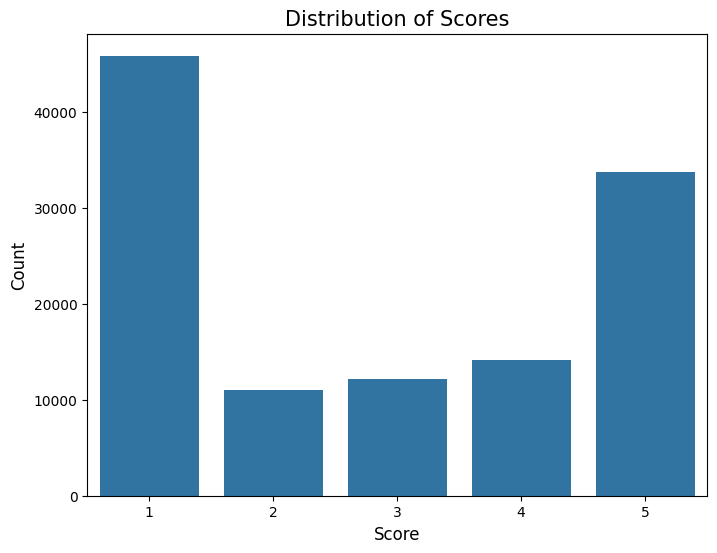

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = "netflix_reviews.csv"
data = pd.read_csv(file_path)

# 결측치 제거 및 감성 레이블 생성
data = data.dropna(subset=['content'])  # 결측치 제거

def label_sentiment(score):
    if score >= 4:
        return 1  # 긍정
    elif score <= 2:
        return 0  # 부정
    else:
        return 3  # 중립

data['sentiment'] = data['score'].apply(label_sentiment)
data = data.dropna(subset=['sentiment'])  # 중립 제거

# 점수별 리뷰 개수 분포 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=data['score'].value_counts().index, 
            y=data['score'].value_counts().values)

plt.xlabel('Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Scores', fontsize=15)
plt.show()


In [ ]:
# 리뷰 예측 모델 학습시키기 (LSTM)
